In [1]:
import pandas as pd
import math
import requests
import acquire as a
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from vega_datasets import data
%matplotlib inline

Use the above dataset for the following exercises:
1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
# Load the dataset
df = data.sf_temps()
# Set the 'date' column as the index
df.set_index('date', inplace=True)
df.head(3)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9


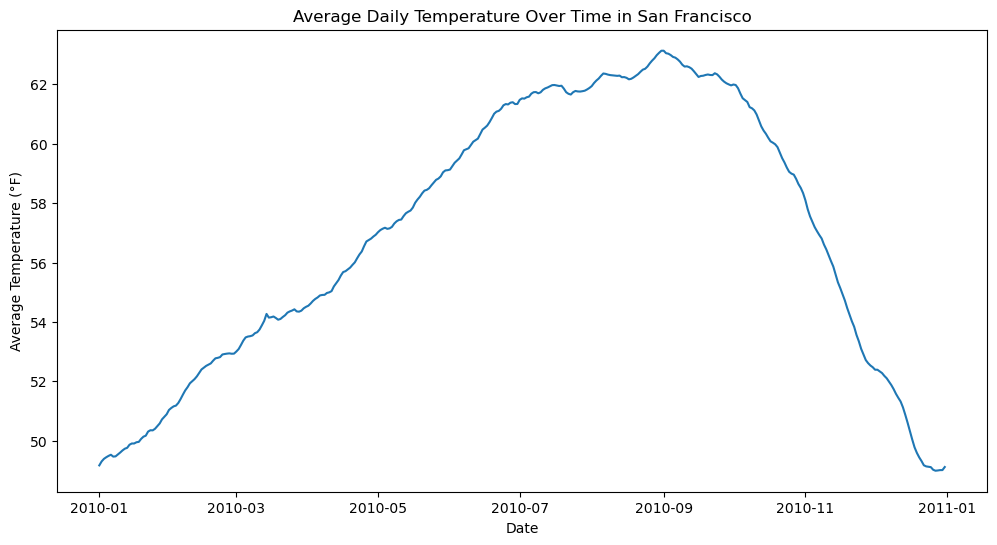

In [3]:
# Assuming data.sf_temps() loads the data into a DataFrame df
df = data.sf_temps()

# Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Resample by day and calculate the mean temperature
daily_avg_temp = df['temp'].resample('D').mean()

# Plot the daily average temperature over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_avg_temp.index, y=daily_avg_temp)
plt.title('Average Daily Temperature Over Time in San Francisco')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.show()


2. Write the code necessary to visualize the minimum temperature over time.

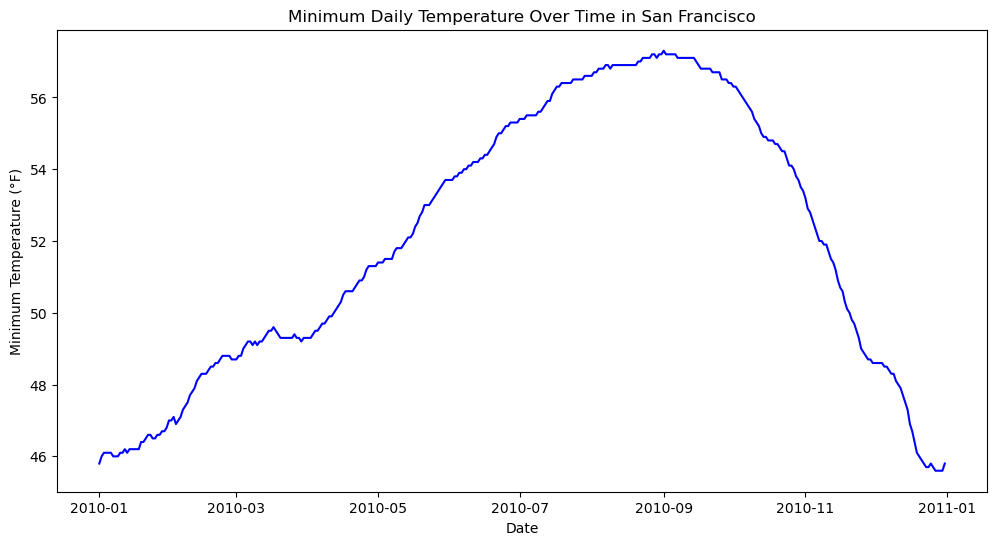

In [4]:
# Resample by day and calculate the minimum temperature
daily_min_temp = df['temp'].resample('D').min()

# Plot the daily minimum temperature over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_min_temp.index, y=daily_min_temp, color='blue')
plt.title('Minimum Daily Temperature Over Time in San Francisco')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (°F)')
plt.show()


3. Write the code necessary to visualize the maximum temperature over time.

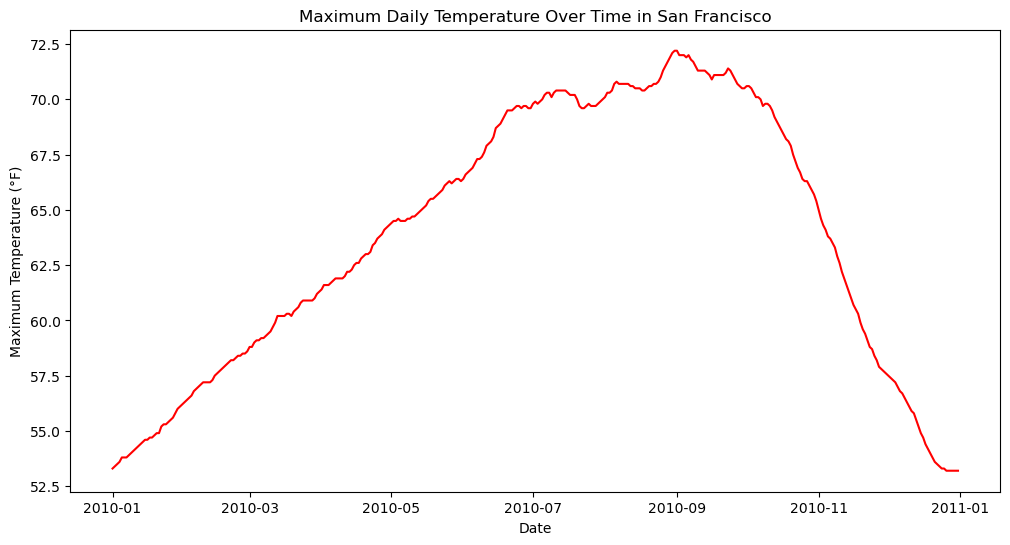

In [5]:
# Resample by day and calculate the maximum temperature
daily_max_temp = df['temp'].resample('D').max()

# Plot the daily maximum temperature over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_max_temp.index, y=daily_max_temp, color='red')
plt.title('Maximum Daily Temperature Over Time in San Francisco')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (°F)')
plt.show()


4. Which month is the coldest, on average?

In [6]:
# Resample by month and calculate the mean temperature for each month
monthly_avg_temp = df['temp'].resample('M').mean()

# Find the month with the lowest average temperature
coldest_month = monthly_avg_temp.idxmin()

print(f'The coldest month, on average, is: {coldest_month.strftime("%B")}')

The coldest month, on average, is: January


5. Which month has the highest average temperature?

In [7]:
# Resample by month and calculate the mean temperature for each month
monthly_avg_temp = df['temp'].resample('M').mean()

# Find the month with the highest average temperature
warmest_month = monthly_avg_temp.idxmax()

print(f'The warmest month, on average, is: {warmest_month.strftime("%B")}')


The warmest month, on average, is: September


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [8]:
# Resample by day and calculate the min and max temperature for the day
daily_temp_stats = df['temp'].resample('D').agg(['min', 'max'])

# Calculate the change in temperature for the day
daily_temp_stats['temp_change'] = daily_temp_stats['max'] - daily_temp_stats['min']

# Now, resample by month to find the average daily temperature variability for each month
monthly_temp_variability = daily_temp_stats['temp_change'].resample('M').mean()

# Find the month with the highest average daily temperature variability
most_variable_month = monthly_temp_variability.idxmax()

print(f'The month with the highest average daily temperature variability is: {most_variable_month.strftime("%B")}')


The month with the highest average daily temperature variability is: September


7. **Bonus**: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

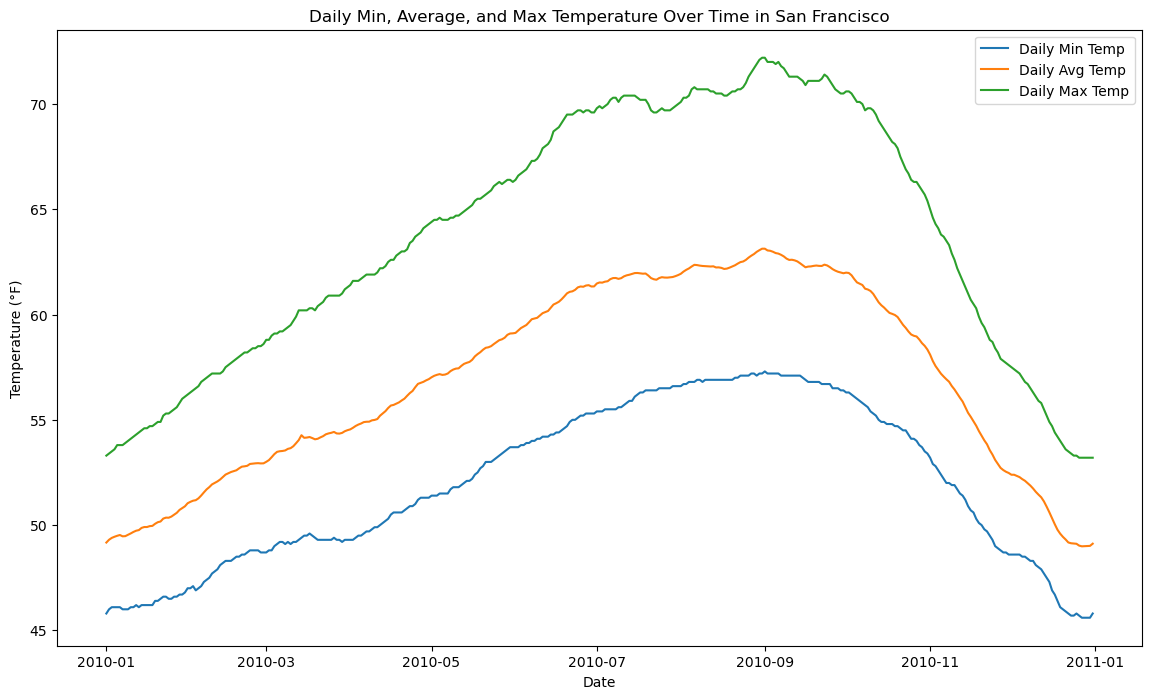

In [9]:
# Resample by day and calculate the min, mean, and max temperature for the day
daily_temp_stats = df['temp'].resample('D').agg(['min', 'mean', 'max'])

# Plot the daily min, average, and max temperature over time
plt.figure(figsize=(14, 8))

# Plot each series on the same graph
sns.lineplot(data=daily_temp_stats['min'], label='Daily Min Temp')
sns.lineplot(data=daily_temp_stats['mean'], label='Daily Avg Temp')
sns.lineplot(data=daily_temp_stats['max'], label='Daily Max Temp')

# Customize the plot with titles, labels, and legend
plt.title('Daily Min, Average, and Max Temperature Over Time in San Francisco')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()

# Show the plot
plt.show()

# _________________________________________________________________________________________________________________

In [10]:
df = data.seattle_weather()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [12]:
df = df.set_index('date')
df.head(3)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain


Use the above dataset for the following exercises:
1. Which year and month combination has the highest amount of precipitation?

In [13]:
# Resample the data by month and sum the precipitation for each month
monthly_precipitation = df['precipitation'].resample('M').sum()

# Find the month with the highest total precipitation
max_precipitation_month = monthly_precipitation.idxmax()

# Print the year and month with the highest precipitation
print(f"The year and month with the highest amount of precipitation is: {max_precipitation_month.strftime('%Y-%m')}")


The year and month with the highest amount of precipitation is: 2015-12


2. Visualize the amount of monthly precipitation over time.

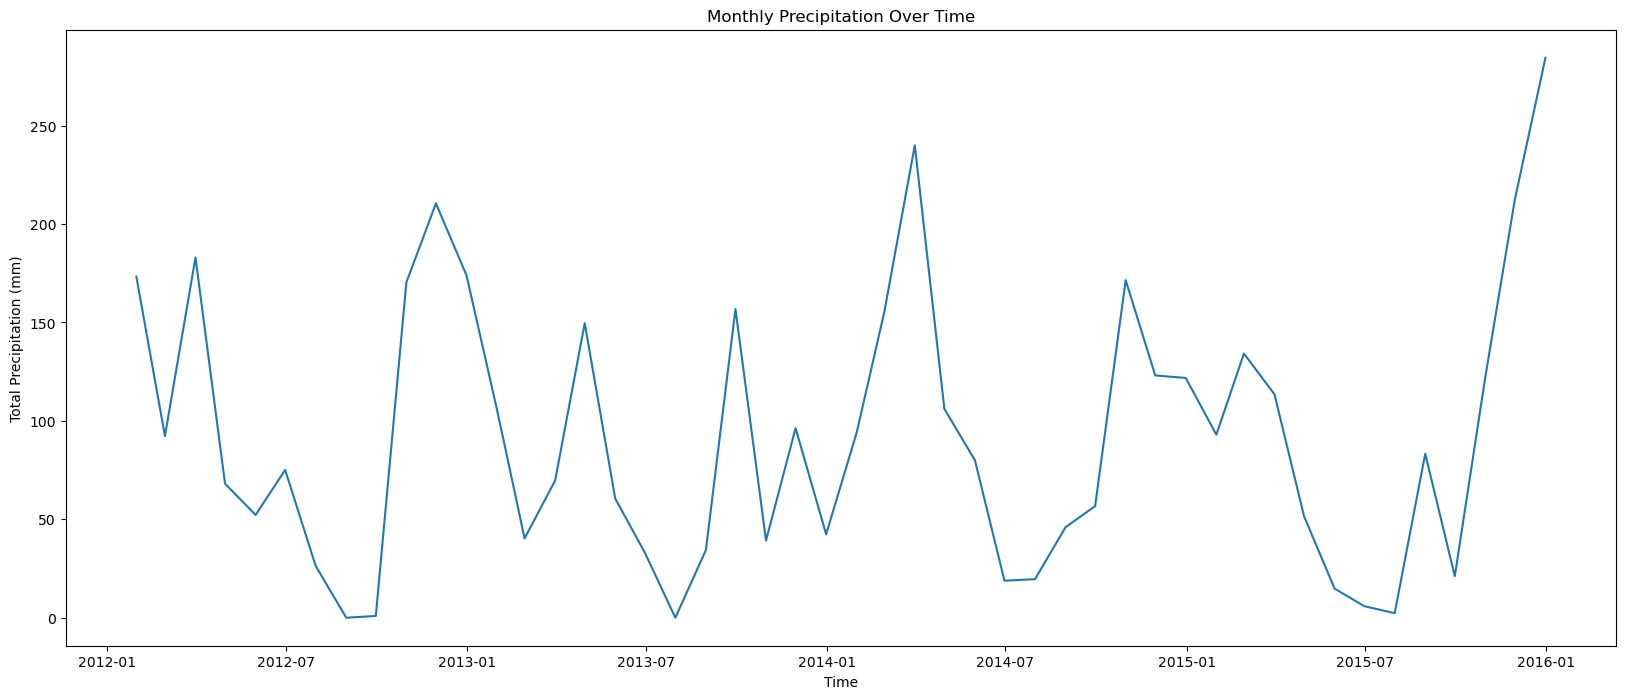

In [14]:
# Resample to get the total precipitation per month
monthly_precipitation = df['precipitation'].resample('M').sum()

# Plot the monthly precipitation over time
plt.figure(figsize=(20, 8))
sns.lineplot(x=monthly_precipitation.index, y=monthly_precipitation)
plt.title('Monthly Precipitation Over Time')
plt.xlabel('Time')
plt.ylabel('Total Precipitation (mm)')
plt.show()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

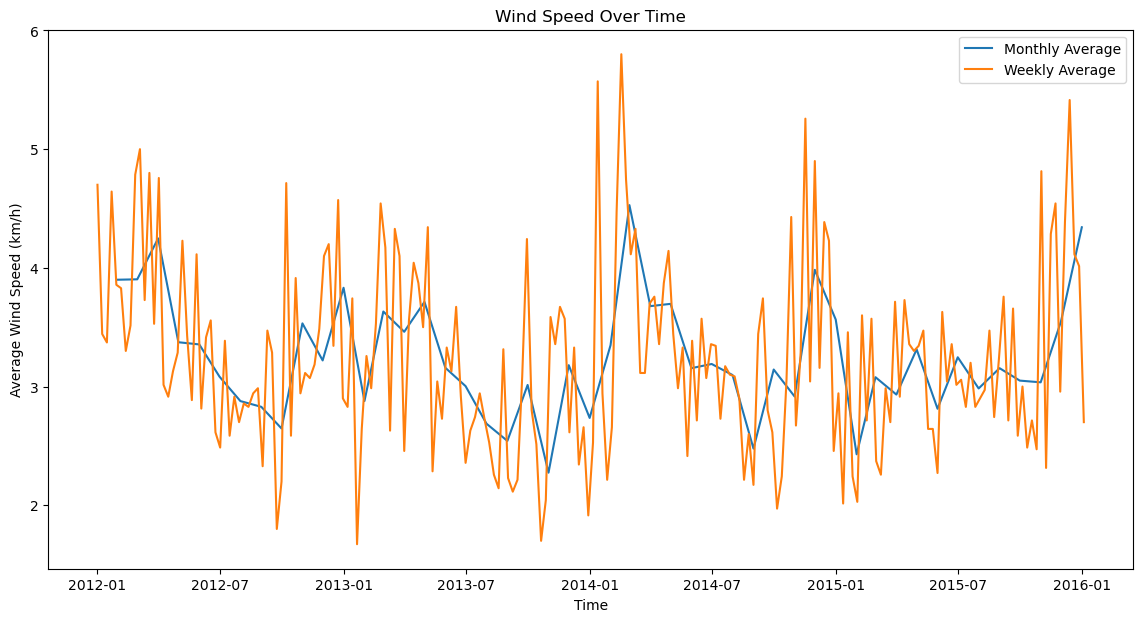

In [15]:
# Resample to get the average wind speed per month
monthly_wind = df['wind'].resample('M').mean()

# Resample to get the average wind speed per week
weekly_wind = df['wind'].resample('W').mean()

# Plot the monthly wind speed over time
plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_wind.index, y=monthly_wind, label='Monthly Average')
sns.lineplot(x=weekly_wind.index, y=weekly_wind, label='Weekly Average')
plt.title('Wind Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Average Wind Speed (km/h)')
plt.legend()
plt.show()

4. Which year-month combination is the windiest?

In [16]:
# Resample to get the average wind speed per month
monthly_wind = df['wind'].resample('M').mean()

# Find the month with the highest average wind speed
windiest_month = monthly_wind.idxmax()

# Print the year and month with the highest average wind speed
print(f"The windiest year-month combination is: {windiest_month.strftime('%Y-%m')}")

The windiest year-month combination is: 2014-02


5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [17]:
# Create a new column that will have '1' for sunny days and '0' for other days
df['sunny'] = (df['weather'] == 'sun').astype(int)

# Resample by year and sum the 'sunny' column to get the total number of sunny days per year
annual_sunny_days = df['sunny'].resample('Y').sum()

# Find the year with the highest number of sunny days
sunniest_year = annual_sunny_days.idxmax().year

print(f"The sunniest year is: {sunniest_year}")

The sunniest year is: 2014


6. In which month does it rain the most?

In [18]:
# Extract month from the index and create a new column 'month'
df['month'] = df.index.month

# Group by the 'month' column and sum the precipitation for each month across all years
monthly_rainfall = df.groupby('month')['precipitation'].sum()

# Find the month with the highest total precipitation
rainiest_month = monthly_rainfall.idxmax()

# Convert the month number to month name
rainiest_month_name = pd.to_datetime(str(rainiest_month), format='%m').strftime('%B')

print(f"The month with the highest total precipitation is: {rainiest_month_name}")

The month with the highest total precipitation is: November


7. Which month has the most number of days with a non-zero amount of precipitation?

In [19]:
# Create a boolean series where days with non-zero precipitation are True
df['precipitation_days'] = df['precipitation'] > 0

# Group by month and count the number of True values for each month
monthly_precipitation_days = df['precipitation_days'].resample('M').sum()

# Find the month with the highest number of non-zero precipitation days
most_precip_days_month = monthly_precipitation_days.idxmax()

# Extract the month name from the timestamp
most_precip_days_month_name = most_precip_days_month.strftime('%B')

print(f"The month with the most number of days with non-zero precipitation is: {most_precip_days_month_name}")

The month with the most number of days with non-zero precipitation is: December


# _________________________________________________________________________________________________________________

In [25]:
df = data.flights_20k()
# Set the 'date' column as the index
df.set_index('date', inplace=True)

df.head(3)

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-13 14:56:00 to 2001-03-14 11:33:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


Use the above dataset for the following exercises:

1. Convert any negative delays to 0.

In [21]:
df['delay'] = df['delay'].apply(lambda x: max(x, 0))
df.head(3)

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL


2. Which hour of the day has the highest average delay?

In [22]:
# Convert 'date' to datetime to extract hour
df['date'] = pd.to_datetime(df['date'])

# Extract hour from the 'date' column
df['hour'] = df['date'].dt.hour

# Group by hour and calculate the average delay
average_delay_by_hour = df.groupby('hour')['delay'].mean()

# Find the hour with the highest average delay
highest_avg_delay_hour = average_delay_by_hour.idxmax()
print(f"The hour of the day that has the highest average delay is: {highest_avg_delay_hour}")

KeyError: 'date'

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x=average_delay_by_hour.index, y=average_delay_by_hour.values)
plt.title('Average Delay by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

NameError: name 'average_delay_by_hour' is not defined

<Figure size 1200x600 with 0 Axes>

3. Does the day of the week make a difference in the delay amount?

In [ ]:
# Extract day of the week from the 'date' column (Monday=0, Sunday=6)
df['day_of_week'] = df['date'].dt.dayofweek

# Group by day of the week and calculate the average delay
average_delay_by_day = df.groupby('day_of_week')['delay'].mean()

# Check the differences in average delay
average_delay_by_day

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=average_delay_by_day.index, y=average_delay_by_day.values)
plt.title('Average Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Set custom labels for the days of the week
plt.show()

Seems like day 4 has a much higher delay than all othe days, while day 0 has the shortest delay.

4. Does the month make a difference in the delay amount?

In [ ]:
# Extract month from the 'date' column
df['month'] = df['date'].dt.month

# Group by month and calculate the average delay
average_delay_by_month = df.groupby('month')['delay'].mean()

# Check the differences in average delay
average_delay_by_month

In [ ]:
# Group by month and calculate the mean delay
monthly_average_delay = df.resample('M')['delay'].mean()

In [ ]:
# Plotting the average delay by month for the available months
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_delay_by_month.index.strftime('%b'), y=average_delay_by_month.values)
plt.title('Average Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
# The x-ticks will automatically be set to the months present in the data
plt.show()

# _________________________________________________________________________________________________________________

### **Bonus**

In [ ]:
df = data.iowa_electricity()
df.head(3)

Use the above dataset for the following exercises:

1. For each row, calculate the percentage of the year's total that energy source provided.

2. Lineplot of generation over time, color by source

3. Display the data as table where years are columns, and energy source is rows (Hint: `df.pivot_table`)

4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

5. Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
- express each number as a % of the year's total

1. Use the sf_temps dataset

2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

4. Create pretty labels for time plots

5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

Explore the `birdstrikes` dataset.

In [ ]:
df = data.birdstrikes()